# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [115]:
df = pd.read_csv('unconv.csv')
df.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

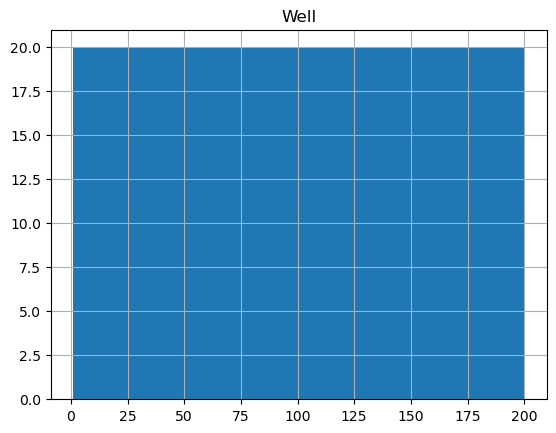

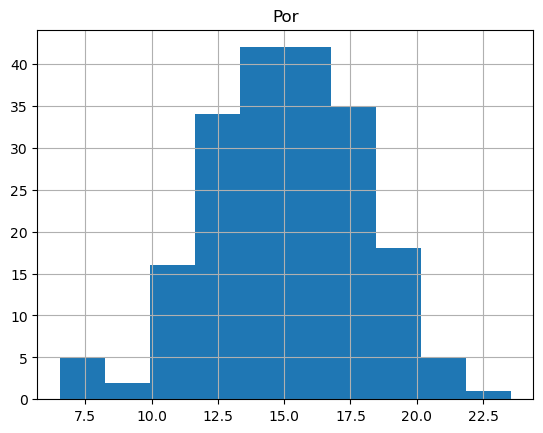

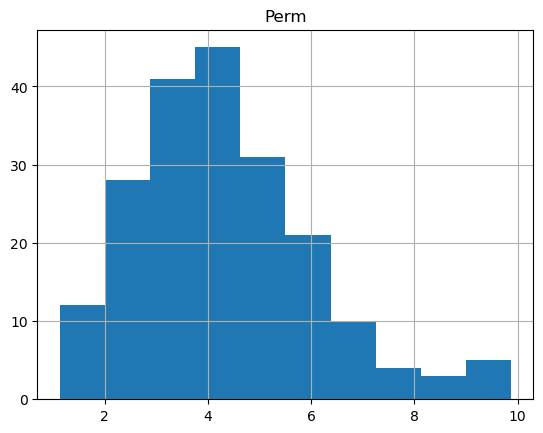

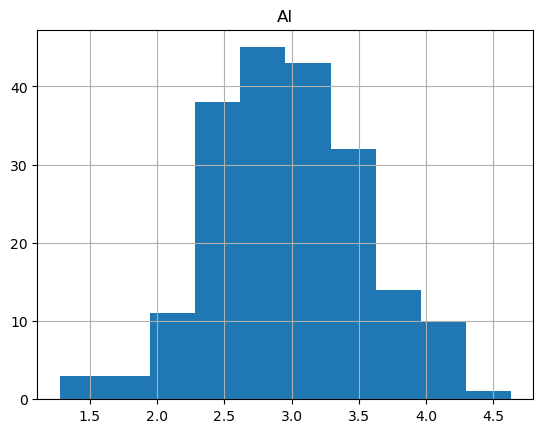

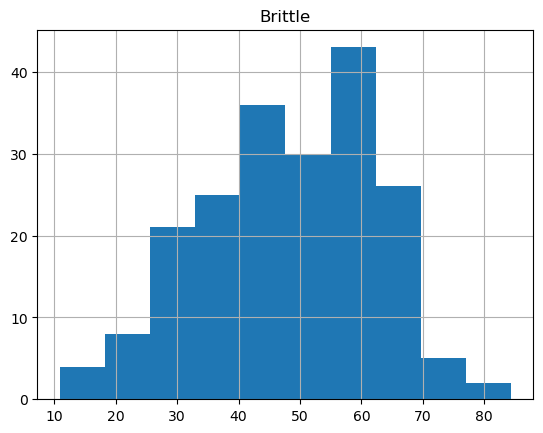

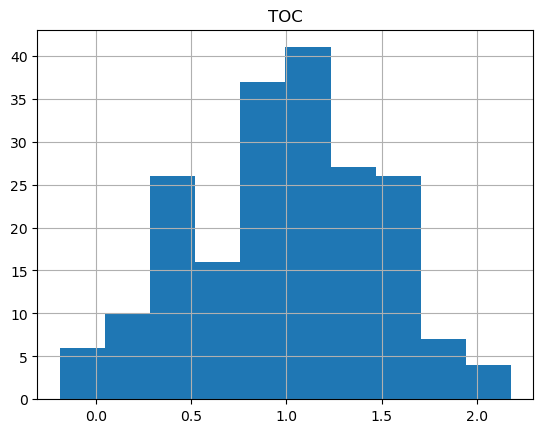

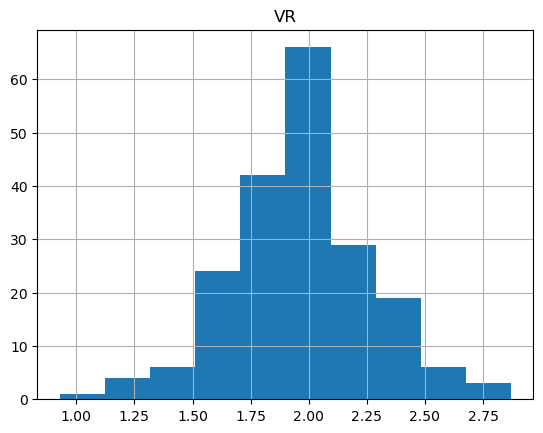

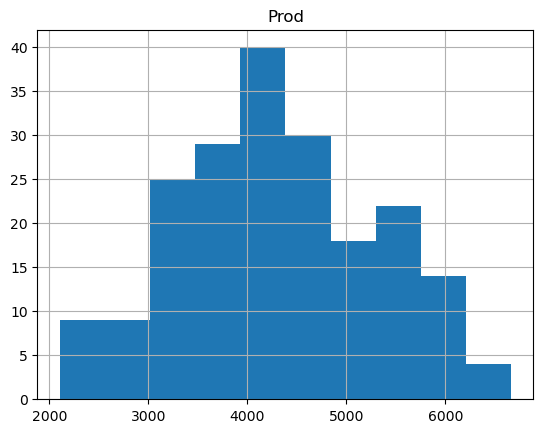

In [116]:
for column in df.columns:
    df[column].hist()
    plt.title(column)
    plt.show()

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

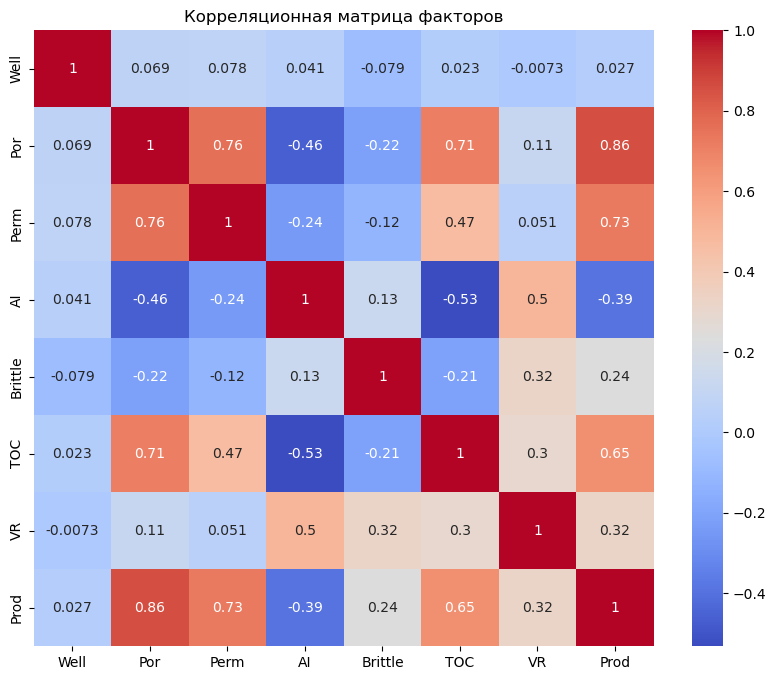

In [5]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица факторов')
plt.show()

In [6]:
# Вычисляем ранг и определитель матрицы корреляций
rank = np.linalg.matrix_rank(corr_matrix)
print('Ранг -', rank)
det = np.linalg.det(corr_matrix)
print('Определитель -', det)

Ранг - 8
Определитель - 0.0007299388072652082


**Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?** - Является

**Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных?**

Мультиколлинеарность возникает, когда две или более независимых переменных высоко коррелированы друг с другом. В данной матрице мы можем заметить следующие сильные корреляции:

• Por и Perm: 0.76

• Por и TOC: 0.711831

**Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему?**

Модель классической линейной регрессии по методу наименьших квадратов может быть не применима в случае наличия мультиколлинеарности. Причины:

• Мультиколлинеарность затрудняет оценку коэффициентов регрессии, так как они могут иметь большие стандартные ошибки.

• Это может привести к нестабильным и ненадежным прогнозам.

Если определитель матрицы близок к нулю, это также подтверждает, что данные плохо обусловлены, и использование линейной регрессии может быть нецелесообразным.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [7]:
X = df.loc[:, ~df.columns.isin(['Prod'])]
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = df.loc[:, 'Prod']

In [8]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta_rounded = np.round(beta)
print("Коэффициенты модели без стандартизации:", list(beta_rounded))

Коэффициенты модели без стандартизации: [-1232.0, 0.0, 230.0, 116.0, -365.0, 25.0, -78.0, 785.0]


In [9]:
list(zip(df.loc[:, ~df.columns.isin(['Prod'])].columns, beta_rounded[1:]))

[('Well', 0.0),
 ('Por', 230.0),
 ('Perm', 116.0),
 ('AI', -365.0),
 ('Brittle', 25.0),
 ('TOC', -78.0),
 ('VR', 785.0)]

**Из представленных коэффициентов можно сделать следующие выводы о информативности признаков:**

• Коэффициент при признаке Well (0.0): Это значение указывает на то, что признак не оказывает влияния на целевую переменную

• Остальные коэффициенты показывают, что они имеют значительное влияние на целевую переменную, так как их значения далеки от нуля

**Интерпретация нескольких коэффициентов**

• Коэффициент при признаке Por (230.0):

  • Этот коэффициент указывает на то, что при увеличении признака на одну стандартную единицу, целевая переменная увеличивается в среднем на 230 единиц

И т.д

• Коэффициент при признаке AI (-365.0):

  • Отрицательный коэффициент в -365.0 показывает, что при увеличении признака на одну стандартную единицу целевая переменная в среднем уменьшается на 365 единиц

На основании анализа коэффициентов можно сделать вывод о том, что один из признаков (Well) неинформативен и может быть исключен из модели. Остальные признаки оказывают различное влияние на целевую переменную: некоторые положительно, другие отрицательно

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [10]:
data = pd.DataFrame({
    'Well': [106.0],
    'Por': [15.32],
    'Perm': [3.71],
    'AI': [3.29],
    'Brittle': [55.99],
    'TOC': [1.35],
    'VR': [2.42]
 }).to_numpy()
print('Прогнозная добыча -', *np.dot(data, beta_rounded[1:]) + beta_rounded[0])
print('Абсолютная ошибка -', abs(4748.315024-(np.dot(data, beta_rounded[1:]) + beta_rounded[0])[0]))
print('Относительная ошибка -', round(abs(4748.315024-(np.dot(data, beta_rounded[1:]) + beta_rounded[0])[0])/4748.315024*100, 2), '%')

Прогнозная добыча - 4715.26
Абсолютная ошибка - 33.05502400000023
Относительная ошибка - 0.7 %


In [11]:
y_pred = np.dot(df.loc[:, ~df.columns.isin(['Prod'])], beta_rounded[1:]) + np.array(beta_rounded[0])
y_pred

array([4620.99, 3410.21, 4715.17, 5041.96, 3814.24, 4263.64, 4201.45,
       3382.86, 4200.62, 4564.72, 4759.1 , 4954.91, 5372.61, 5395.19,
       4571.77, 3533.81, 5429.34, 3959.92, 4799.55, 3781.68, 5600.27,
       4538.23, 2554.94, 2340.49, 5713.41, 2114.53, 4857.19, 4164.97,
       2729.22, 3718.03, 5648.43, 3721.44, 3919.65, 4034.75, 3708.1 ,
       2754.6 , 3491.14, 5423.11, 4150.7 , 4669.61, 4256.07, 4359.12,
       3092.3 , 2676.62, 5527.52, 3293.07, 2898.22, 2401.02, 5216.65,
       5071.62, 5335.63, 5933.97, 4534.55, 3853.87, 5426.14, 3986.65,
       3247.27, 3776.01, 3656.48, 4107.31, 5786.2 , 3731.85, 5377.34,
       4357.96, 5595.75, 4370.91, 3490.38, 3851.  , 4185.  , 3754.33,
       3198.61, 4329.21, 4114.89, 4191.72, 5274.52, 5793.95, 5234.7 ,
       3124.89, 4498.53, 5394.45, 4489.54, 4362.65, 4253.65, 4376.16,
       2566.3 , 4171.84, 4216.39, 4646.06, 3301.77, 3610.2 , 3795.89,
       1787.54, 5378.62, 3885.69, 5073.1 , 5086.75, 5337.58, 6036.63,
       3549.86, 5144

In [16]:
RMSE = round(np.sqrt(1/len(y_pred)*np.sum((y-y_pred)**2)), 2)
RMSE

198.46

RMSE показывает среднее значение разницы между фактическими значениями и предсказанными значениями

Это означает, что в среднем модель предсказывает значения с ошибкой около 198.46

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

**Анализ:**

1. Well:

   • Коэффициент: 0.0

   • Корреляция с Prod: 0.026817

   • Комментарий: Нет значимого влияния на Prod.

2. Por:

   • Коэффициент: 230.0

   • Корреляция с Prod: 0.861910

   • Комментарий: Высокая положительная корреляция и высокий коэффициент, что указывает на сильное влияние на Prod.

3. Perm:

   • Коэффициент: 116.0

   • Корреляция с Prod: 0.727426

   • Комментарий: Положительная корреляция и значительное влияние на Prod.

4. AI:

   • Коэффициент: -365.0

   • Корреляция с Prod: -0.390835

   • Комментарий: Отрицательная корреляция и средне-значительное отрицательное влияние на Prod.

5. Brittle:

   • Коэффициент: 25.0

   • Корреляция с Prod: 0.237155

   • Комментарий: Слабая положительная корреляция и незначительное влияние на Prod.

6. TOC:

   • Коэффициент: -78.0

   • Корреляция с Prod: 0.654445

   • Комментарий: Положительная корреляция, но отрицательный коэффициент, что указывает на сложные взаимосвязи.

7. VR:

   • Коэффициент: 785.0

   • Корреляция с Prod: 0.323182

   • Комментарий: Положительная корреляция и высокий коэффициент, что указывает на значительное влияние на Prod.

**Заключение:**

• Наиболее значимые факторы, влияющие на целевой признак (Prod), — это Por, Perm и VR, которые имеют высокие положительные коэффициенты и корреляции.

• AI имеет значительное отрицательное влияние на Prod, что также подтверждается отрицательной корреляцией.

• TOC имеет положительную корреляцию, но отрицательный коэффициент, что может указывать на то, что при увеличении TOC может наблюдаться снижение Prod в определённых условиях.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

• Por и Perm имеют корреляцию 0.76, что выше 0.7. Оставим Por, так как он имеет более высокую корреляцию с целевой переменной.

• Por и TOC имеют корреляцию 0.71, что выше 0.7. Оставим Por, так как он имеет более высокую корреляцию с целевой переменной.

• Все факторы, кроме Well (0.03), имеют корреляцию выше 0.05.

Оставшиеся факторы:

• Por: 0.861910

• AI: -0.390835

• Brittle: 0.237155

• VR: 0.323182

In [49]:
X = df.loc[:, ~df.columns.isin(['Prod', 'Perm', 'TOC', 'Well'])]
X = np.c_[np.ones((X.shape[0], 1)), X]
y = df.loc[:, 'Prod']

theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

theta_best_rounded = np.round(theta_best).astype(int)

print('Коэффициенты улучшенной модели без стандартизации:', theta_best_rounded)

Коэффициенты улучшенной модели без стандартизации: [-1835   293  -200    28   517]


In [50]:
y_pred = np.dot(df.loc[:, ~df.columns.isin(['Prod', 'Perm', 'TOC', 'Well'])], theta_best_rounded[1:]) + np.array(theta_best_rounded[0])
RMSE = round(np.sqrt(1/len(y_pred)*np.sum((y-y_pred)**2)), 2)
RMSE

232.29

In [51]:
list(zip(df.loc[:, ~df.columns.isin(['Prod', 'Perm', 'TOC', 'Well'])].columns, theta_best_rounded[1:]))

[('Por', 293), ('AI', -200), ('Brittle', 28), ('VR', 517)]

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [ ]:
X = df.loc[:, ~df.columns.isin(['Prod', 'Perm', 'TOC', 'Well'])]
y = df.loc[:, 'Prod']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [43]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([np.array(y_test), y_pred]).T
result.columns = ['y_test', 'y_pred']
result.head()

,y_test,y_pred
0,5350.949293,5251.072337
1,3539.984263,3514.810578
2,5859.748328,5563.506706
3,4092.730535,4089.681164
4,4118.586934,4009.735095


In [ ]:
# Оцениваем качество на тестовой выборки
RMSE = round(root_mean_squared_error(y_test, y_pred), 2)
RMSE

226.58

В целом обе модели (ручная и из sklearn) показалли себя +- одинаково по метрике RMSE, последняя незначительно точнее

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [57]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [59]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_std)
print('После генерации полиномиальных признаков стало:', X_poly.shape[1])

После генерации полиномиальных признаков стало: 55


In [ ]:
model = LinearRegression().fit(X_poly, y)
# оцениваем качество модели на кросс-валидации, метрика — MAPE
cv_results = cross_validate(model, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))	

MAPE на тренировочных фолдах: 6.29 %
MAPE на валидационных фолдах: 7.39 %


Точность предсказания на валидационной выборке и тренировочной +- одинакова, а значит у модели небольшой разброс

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
#Найдём коэффициент альфа
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_poly, y)
print(grid_search.best_params_)

{'alpha': 10}


e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.430e+05, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.398e+05, tolerance: 1.545e+04
  model = cd_fast.enet_coordinate_descent(
e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+05, tolerance: 1.617e+04
  model = cd_fast.enet_coo

In [110]:
lasso = Lasso(alpha=grid_search.best_params_['alpha']).fit(X_poly, y)
cv_results = cross_validate(lasso, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
scores_lasso = -cv_results['train_score'].mean()* 100
scores_lasso_val = -cv_results['test_score'].mean()* 100
print('MAPE на тренировочных фолдах: {:.2f} %'.format(scores_lasso))
print('MAPE на валидационных фолдах: {:.2f} %'.format(scores_lasso_val))	

MAPE на тренировочных фолдах: 1.95 %
MAPE на валидационных фолдах: 2.38 %


Точность модели после регуляризации возрасла, что может свидетельствовать о том, что она хорошо обучилась

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [76]:
#Найдём коэффициент альфа
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_poly, y)
print(grid_search.best_params_)

{'alpha': 1}


In [111]:
ridge = Lasso(alpha=grid_search.best_params_['alpha']).fit(X_poly, y)
cv_results = cross_validate(ridge, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
scores_ridge = -cv_results['train_score'].mean()* 100
scores_ridge_val = -cv_results['test_score'].mean() * 100
print('MAPE на тренировочных фолдах: {:.2f} %'.format(scores_ridge))
print('MAPE на валидационных фолдах: {:.2f} %'.format(scores_ridge_val))

MAPE на тренировочных фолдах: 1.95 %
MAPE на валидационных фолдах: 2.38 %


Точность модели после регуляризации возрасла, что может свидетельствовать о том, что она хорошо обучилась

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [ ]:
#Найдём коэффициент альфа и l1-ratio
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': np.linspace(0, 1, 10)}
elasticnet  = ElasticNet()
grid_search = GridSearchCV(elasticnet, param_grid, cv=5)
grid_search.fit(X_poly, y)
print(grid_search.best_params_)

e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.694e+06, tolerance: 1.612e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.678e+06, tolerance: 1.545e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inst

{'alpha': 10, 'l1_ratio': 1.0}


e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.203e+07, tolerance: 1.612e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
e:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.874e+07, tolerance: 1.545e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inst

In [112]:
elasticnet = ElasticNet(alpha=grid_search.best_params_['alpha'], l1_ratio=grid_search.best_params_['l1_ratio'])
cv_results = cross_validate(elasticnet, X_poly, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
scores_elasticnet = -cv_results['train_score'].mean()* 100
scores_elasticnet_val = -cv_results['test_score'].mean() * 100
print('MAPE на тренировочных фолдах: {:.2f} %'.format(scores_elasticnet))
print('MAPE на валидационных фолдах: {:.2f} %'.format(scores_elasticnet_val))

MAPE на тренировочных фолдах: 1.95 %
MAPE на валидационных фолдах: 2.38 %


Точность модели после регуляризации возрасла, что может свидетельствовать о том, что она хорошо обучилась

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [ ]:
data = {
    'Наименование модели': ['Lasso', 'Ridge', 'ElasticNet'],
    'Гиперпараметры': ['alpha', 'alpha', 'alpha, l1_ratio'],
    'Использовались ли полиномиальные признаки': ['Да', 'Да', 'Да'],
    'Значение метрики на тренировочных фолдах': [scores_lasso, scores_ridge, scores_elasticnet],
    'Значение метрики на валидационных фолдах': [scores_lasso_val, scores_ridge_val, scores_elasticnet_val]
}
df = pd.DataFrame(data)
df

,Наименование модели,Гиперпараметры,Использовались ли полиномиальные признаки,Значение метрики на тренировочных фолдах,Значение метрики на валидационных фолдах
0,Lasso,alpha,Да,1.951498,2.375893
1,Ridge,alpha,Да,1.951498,2.375893
2,ElasticNet,"alpha, l1_ratio",Да,1.951498,2.375893


На таком маеньком объеме данных все три типа регуляризации показали себя одинаково